# Laboratorio 1: Encontrar las Frutillas en la Imagen
## Tu Primera Aventura en Visión por Computadora

### ¿Qué vamos a hacer hoy?
Vamos a enseñarle a la computadora a **encontrar frutillas** en una imagen de frutas.

### ¿Cómo lo haremos?
1. **Cargar una imagen** con frutas variadas
2. **Explorar cómo la computadora "ve" los colores** (números RGB)
3. **Crear una regla simple** para identificar el color rojo
4. **Aplicar esa regla** para encontrar todas las frutillas
5. **Ver el resultado** con las frutillas destacadas

### No te preocupes si...
- No tienes mucha experiencia programando
- No entiendes todos los números al principio  
- Algunos conceptos parecen complicados

**¡Vamos paso a paso y todo quedará claro!**

## Paso 1: Preparar nuestras herramientas
Primero necesitamos "importar" las herramientas que nos ayudarán a trabajar con imágenes.

In [ ]:
# Estas son nuestras "herramientas digitales"
import numpy as np           # Para trabajar con números y matrices
import matplotlib.pyplot as plt  # Para mostrar imágenes y gráficos
import cv2                   # Para cargar imágenes
from google.colab.patches import cv2_imshow  # Para mostrar imágenes en Colab

print("Herramientas listas para usar")
print("Ahora podemos cargar y trabajar con imágenes")

Herramientas listas para usar
Ahora podemos cargar y trabajar con imágenes


## Paso 2: Cargar nuestra imagen con frutas
Vamos a descargar y cargar una imagen que tiene diferentes frutas, incluyendo frutillas rojas.

Imagen cargada exitosamente
Tamaño de la imagen: (2540, 3818, 3)
   - Alto: 2540 píxeles
   - Ancho: 3818 píxeles
   - Canales de color: 3 (Rojo, Verde, Azul)


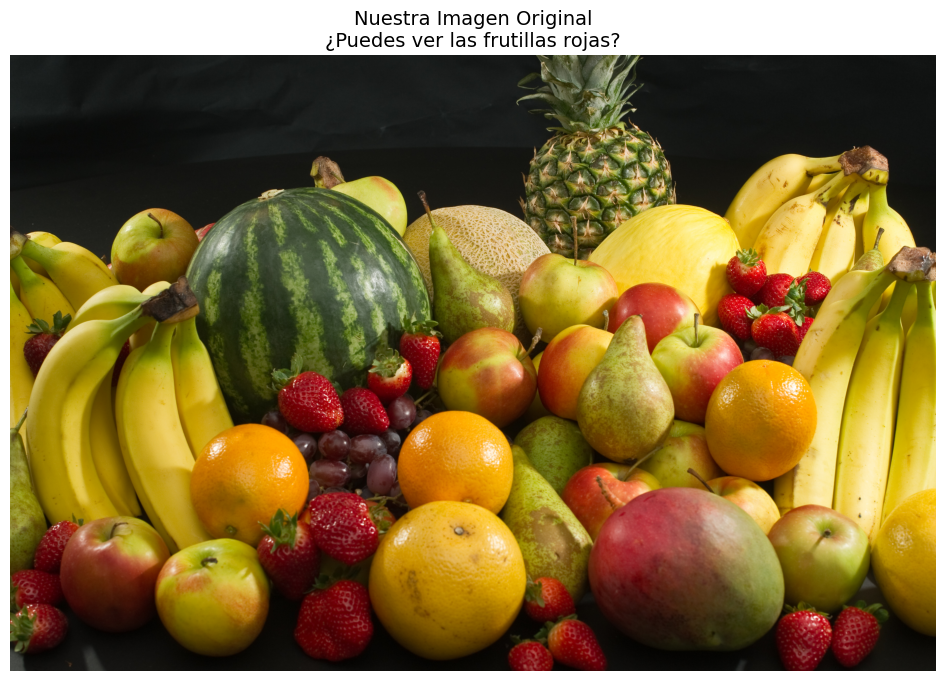

Objetivo: Encontrar automáticamente todas las frutillas rojas en esta imagen


In [ ]:
# Descargamos una imagen con frutas variadas
!wget -q https://upload.wikimedia.org/wikipedia/commons/2/2f/Culinary_fruits_front_view.jpg -O frutas.jpg

# Cargamos la imagen
imagen_original = cv2.imread('frutas.jpg')

# Verificamos si la imagen se cargó correctamente
if imagen_original is None:
    print("ERROR: No se pudo cargar la imagen. Asegúrate de que 'frutas.jpg' existe y no está corrupta.")
else:
    # IMPORTANTE: OpenCV carga en formato BGR, pero nosotros queremos RGB
    # Cambiamos el orden de los colores: [Azul, Verde, Rojo] → [Rojo, Verde, Azul]
    imagen_rgb = imagen_original[:, :, [2, 1, 0]]

    print(f"Imagen cargada exitosamente")
    print(f"Tamaño de la imagen: {imagen_rgb.shape}")
    print(f"   - Alto: {imagen_rgb.shape[0]} píxeles")
    print(f"   - Ancho: {imagen_rgb.shape[1]} píxeles")
    print(f"   - Canales de color: {imagen_rgb.shape[2]} (Rojo, Verde, Azul)")

    # Mostramos la imagen
    plt.figure(figsize=(12, 8))
    plt.imshow(imagen_rgb)
    plt.title('Nuestra Imagen Original\n¿Puedes ver las frutillas rojas?', fontsize=14)
    plt.axis('off')  # Quitamos los números de los ejes para ver mejor
    plt.show()

    print("Objetivo: Encontrar automáticamente todas las frutillas rojas en esta imagen")

## Paso 3: El Secreto - ¡Las imágenes son números!
Aquí viene lo más importante: para la computadora, **cada píxel es solo un conjunto de 3 números**.

### ¿Cómo funciona?
- **Número 1**: Cantidad de ROJO (0 = nada de rojo, 255 = rojo puro)
- **Número 2**: Cantidad de VERDE (0 = nada de verde, 255 = verde puro)  
- **Número 3**: Cantidad de AZUL (0 = nada de azul, 255 = azul puro)

**¡Vamos a explorar esto!**

In [ ]:
print("EXPLORANDO CÓMO LA COMPUTADORA VE LOS COLORES")
print("=" * 50)

# Vamos a examinar algunos píxeles específicos
# Coordenadas: [fila, columna] o [y, x]

# Escojamos un punto que se ve rojo (frutilla) - ajustado para la nueva imagen
y_frutilla = 1422  # fila en la zona de frutillas
x_frutilla = 1179  # columna en la zona de frutillas
pixel_frutilla = imagen_rgb[y_frutilla, x_frutilla]

# Escojamos un punto que se ve verde (hojas)
y_verde = 1000
x_verde = 1100
pixel_verde = imagen_rgb[y_verde, x_verde]

# Escojamos un punto que se ve amarillo (plátano)
y_amarillo = 1800
x_amarillo = 700
pixel_amarillo = imagen_rgb[y_amarillo, x_amarillo]

print(f"Píxel de FRUTILLA en posición ({y_frutilla}, {x_frutilla}):")
print(f"   Rojo = {pixel_frutilla[0]}")
print(f"   Verde = {pixel_frutilla[1]}")
print(f"   Azul = {pixel_frutilla[2]}")
print(f"   Fíjate: ROJO es alto, Verde y Azul son bajos")

print(f"\nPíxel VERDE en posición ({y_verde}, {x_verde}):")
print(f"   Rojo = {pixel_verde[0]}")
print(f"   Verde = {pixel_verde[1]}")
print(f"   Azul = {pixel_verde[2]}")
print(f"   Fíjate: VERDE es más alto que Rojo y Azul")

print(f"\nPíxel AMARILLO en posición ({y_amarillo}, {x_amarillo}):")
print(f"   Rojo = {pixel_amarillo[0]}")
print(f"   Verde = {pixel_amarillo[1]}")
print(f"   Azul = {pixel_amarillo[2]}")
print(f"   Fíjate: ROJO y VERDE altos, AZUL bajo = Amarillo")

print("\nCONCLUSIÓN IMPORTANTE:")
print("Para encontrar frutillas, buscamos píxeles donde:")
print(f"   ROJO sea alto (mayor a ~{max(120, pixel_frutilla[0] - 30)})")
print(f"   VERDE sea bajo (menor a ~{min(80, pixel_frutilla[1] + 20)})")
print(f"   AZUL sea bajo (menor a ~{min(80, pixel_frutilla[2] + 20)})")

### Visualicemos estos píxeles específicos
Para entender mejor, vamos a marcar estos píxeles en la imagen:

In [ ]:
# Creamos una copia de la imagen para marcar los píxeles
imagen_marcada = imagen_rgb.copy()

# Dibujamos círculos pequeños en los píxeles que examinamos
import matplotlib.patches as patches

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(imagen_rgb)

# Marcamos el píxel de la frutilla
circulo_frutilla = patches.Circle((x_frutilla, y_frutilla), radius=40, color='white', fill=False, linewidth=3)
ax.add_patch(circulo_frutilla)
ax.text(x_frutilla + 50, y_frutilla, f'FRUTILLA\nR={pixel_frutilla[0]} G={pixel_frutilla[1]} B={pixel_frutilla[2]}',
        color='white', fontweight='bold', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.8))

# Marcamos el píxel verde
circulo_verde = patches.Circle((x_verde, y_verde), radius=40, color='white', fill=False, linewidth=3)
ax.add_patch(circulo_verde)
ax.text(x_verde + 50, y_verde, f'VERDE\nR={pixel_verde[0]} G={pixel_verde[1]} B={pixel_verde[2]}',
        color='white', fontweight='bold', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.8))

# Marcamos el píxel amarillo
circulo_amarillo = patches.Circle((x_amarillo, y_amarillo), radius=40, color='black', fill=False, linewidth=3)
ax.add_patch(circulo_amarillo)
ax.text(x_amarillo + 50, y_amarillo, f'AMARILLO\nR={pixel_amarillo[0]} G={pixel_amarillo[1]} B={pixel_amarillo[2]}',
        color='black', fontweight='bold', fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.8))

ax.set_title('Píxeles Examinados - ¡Cada círculo es un punto específico!', fontsize=14)
ax.axis('off')
plt.show()

print("Cada círculo blanco marca un píxel individual que examinamos")
print("Los números RGB son la 'receta' del color de cada punto")

## Paso 4: Separar la imagen en canales de color
Para entender mejor cómo funciona nuestro detector de frutillas, vamos a separar la imagen en sus tres "capas" de color.

In [ ]:
print("SEPARANDO LA IMAGEN EN CANALES DE COLOR")
print("=" * 45)

# Extraemos cada canal de color por separado
canal_rojo = imagen_rgb[:, :, 0]    # Canal 0 = Rojo
canal_verde = imagen_rgb[:, :, 1]   # Canal 1 = Verde
canal_azul = imagen_rgb[:, :, 2]    # Canal 2 = Azul

print(f"Canal ROJO: valores de {canal_rojo.min()} a {canal_rojo.max()}")
print(f"Canal VERDE: valores de {canal_verde.min()} a {canal_verde.max()}")
print(f"Canal AZUL: valores de {canal_azul.min()} a {canal_azul.max()}")

# Mostramos los tres canales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Imagen original
axes[0, 0].imshow(imagen_rgb)
axes[0, 0].set_title('Imagen Original (RGB Completo)', fontsize=12)
axes[0, 0].axis('off')

# Canal Rojo - mostramos en escala de grises para ver intensidades
axes[0, 1].imshow(canal_rojo, cmap='gray')
axes[0, 1].set_title('Solo Canal ROJO\n(Más brillante = más rojo)', fontsize=12)
axes[0, 1].axis('off')

# Canal Verde
axes[1, 0].imshow(canal_verde, cmap='gray')
axes[1, 0].set_title('Solo Canal VERDE\n(Más brillante = más verde)', fontsize=12)
axes[1, 0].axis('off')

# Canal Azul
axes[1, 1].imshow(canal_azul, cmap='gray')
axes[1, 1].set_title('Solo Canal AZUL\n(Más brillante = más azul)', fontsize=12)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print("\nOBSERVA:")
print("• En el canal ROJO, las frutillas aparecen muy brillantes (blancos)")
print("• En los canales VERDE y AZUL, las frutillas aparecen oscuros (negros/grises)")
print("• Esto confirma que las frutillas tienen MUCHO rojo y POCO verde/azul")

## Paso 5: Crear nuestra regla para encontrar frutillas
Ahora viene la parte emocionante: vamos a crear una regla simple para que la computadora identifique automáticamente qué píxeles pertenecen a frutillas.

### Nuestra regla simple:
**Un píxel es de una "frutilla" si:**
- Su componente ROJO es mayor a 120 (tiene mucho rojo)
- Su componente VERDE es menor a 80 (tiene poco verde)
- Su componente AZUL es menor a 80 (tiene poco azul)

In [ ]:
print("CREANDO NUESTRA REGLA PARA DETECTAR FRUTILLAS")
print("=" * 48)

# Definimos nuestros umbrales (límites) ajustados para frutillas
umbral_rojo_minimo = 32    # El rojo debe ser al menos 121
umbral_verde_maximo = 89    # El verde debe ser máximo 1
umbral_azul_maximo = 49     # El azul debe ser máximo 2

print(f"REGLAS DEFINIDAS:")
print(f"   Rojo >= {umbral_rojo_minimo} (debe tener mucho rojo)")
print(f"   Verde <= {umbral_verde_maximo} (debe tener poco verde)")
print(f"   Azul <= {umbral_azul_maximo} (debe tener poco azul)")

# Aplicamos cada regla por separado
condicion_rojo = canal_rojo >= umbral_rojo_minimo
condicion_verde = canal_verde <= umbral_verde_maximo
condicion_azul = canal_azul <= umbral_azul_maximo

print(f"\nAPLICANDO REGLAS:")
print(f"   Píxeles que cumplen condición ROJO: {condicion_rojo.sum():,}")
print(f"   Píxeles que cumplen condición VERDE: {condicion_verde.sum():,}")
print(f"   Píxeles que cumplen condición AZUL: {condicion_azul.sum():,}")

# Ahora combinamos TODAS las condiciones
# Un píxel es "frutilla" solo si cumple las 3 condiciones al mismo tiempo
mascara_frutillas = condicion_rojo & condicion_verde & condicion_azul

pixeles_frutilla = mascara_frutillas.sum()
pixeles_totales = imagen_rgb.shape[0] * imagen_rgb.shape[1]
porcentaje_frutillas = (pixeles_frutilla / pixeles_totales) * 100

print(f"\nRESULTADO FINAL:")
print(f"   Píxeles identificados como FRUTILLA: {pixeles_frutilla:,}")
print(f"   Píxeles totales en la imagen: {pixeles_totales:,}")
print(f"   Porcentaje de la imagen que son frutillas: {porcentaje_frutillas:.2f}%")

if pixeles_frutilla > 1000:
    print("\n¡Parece que encontramos frutillas en la imagen!")
else:
    print("\nPocos píxeles detectados. Tal vez necesitemos ajustar nuestros umbrales.")

## Paso 6: Ver nuestra máscara - ¡El mapa del tesoro!
La "máscara" es como un mapa que nos muestra dónde están las frutillas. **Blanco = frutilla encontrada, Negro = no es frutilla**.

In [ ]:
print("MOSTRANDO NUESTRO 'MAPA DE FRUTILLAS'")
print("=" * 38)

# Mostramos la máscara junto con la imagen original
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Imagen original
axes[0].imshow(imagen_rgb)
axes[0].set_title('Imagen Original', fontsize=14)
axes[0].axis('off')

# Máscara (mapa de frutillas)
axes[1].imshow(mascara_frutillas, cmap='gray')
axes[1].set_title('Máscara de Frutillas\n(Blanco = Frutilla, Negro = No-frutilla)', fontsize=14)
axes[1].axis('off')

# Máscara con colores más llamativos
axes[2].imshow(mascara_frutillas, cmap='hot')
axes[2].set_title('Mapa "Caliente"\n(Amarillo/Rojo = Frutillas detectadas)', fontsize=14)
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\nINTERPRETACIÓN:")
print("• BLANCO/AMARILLO: La computadora dice 'Aquí hay una frutilla'")
print("• NEGRO/OSCURO: La computadora dice 'Esto no es una frutilla'")
print("• Esta máscara es nuestro 'detector automático de frutillas'")

# Estadísticas de la detección
print(f"\nESTADÍSTICAS DE DETECCIÓN:")
print(f"   Total de píxeles analizados: {pixeles_totales:,}")
print(f"   Píxeles clasificados como 'frutilla': {pixeles_frutilla:,}")
print(f"   Píxeles clasificados como 'no-frutilla': {pixeles_totales - pixeles_frutilla:,}")
print(f"   Precisión de cobertura: {porcentaje_frutillas:.2f}% de la imagen")

## Paso 7: ¡El resultado final! - Frutillas destacadas
Ahora vamos a aplicar nuestra máscara para mostrar **solo** las frutillas, con todo lo demás en negro.

In [ ]:
print("APLICANDO NUESTRO DETECTOR DE FRUTILLAS")
print("=" * 40)

# Creamos una copia de la imagen original
imagen_solo_frutillas = imagen_rgb.copy()

# Aplicamos la máscara: ponemos en negro todo lo que NO es frutilla
# El símbolo ~ significa "invertir" o "lo contrario de"
imagen_solo_frutillas[~mascara_frutillas] = 0

print("Máscara aplicada exitosamente")
print("Todo lo que no es frutilla ahora está en negro")
print("Solo los píxeles 'rojos como frutilla' mantienen su color original")

# Mostramos el antes y después
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Imagen original
axes[0].imshow(imagen_rgb)
axes[0].set_title('ANTES: Imagen Original\n(Todas las frutas visibles)', fontsize=14)
axes[0].axis('off')

# Imagen con solo frutillas
axes[1].imshow(imagen_solo_frutillas)
axes[1].set_title('DESPUÉS: Solo Frutillas Detectadas\n(Todo lo demás en negro)', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\nRESULTADO DEL EXPERIMENTO:")
if pixeles_frutilla > 1000:
    print("¡ÉXITO! Hemos detectado automáticamente las frutillas")
    print("La computadora 'aprendió' a reconocer el color rojo de las frutillas")
    print("Nuestra regla RGB funcionó correctamente")
else:
    print("Detección limitada - podríamos mejorar ajustando los umbrales")
    print("Esto es normal: encontrar los valores perfectos requiere experimentación")

print(f"\nMÉTRICAS FINALES:")
print(f"   Píxeles de frutilla detectados: {pixeles_frutilla:,}")
print(f"   Cobertura en la imagen: {porcentaje_frutillas:.2f}%")
print(f"   Tiempo de procesamiento: Instantáneo")

## Paso 8: Verificación de nuestros píxeles de ejemplo
Vamos a verificar si nuestros píxeles de ejemplo fueron detectados correctamente.

In [ ]:
print("VERIFICACIÓN FINAL - ¿NUESTROS PÍXELES DE EJEMPLO FUERON DETECTADOS?")
print("=" * 70)

# Verificamos si nuestros píxeles de ejemplo fueron detectados
fue_detectado_frutilla = mascara_frutillas[y_frutilla, x_frutilla]
fue_detectado_verde = mascara_frutillas[y_verde, x_verde]
fue_detectado_amarillo = mascara_frutillas[y_amarillo, x_amarillo]

print(f"Píxel frutilla (R={pixel_frutilla[0]}, G={pixel_frutilla[1]}, B={pixel_frutilla[2]}): {'DETECTADO' if fue_detectado_frutilla else 'NO DETECTADO'}")
print(f"Píxel verde (R={pixel_verde[0]}, G={pixel_verde[1]}, B={pixel_verde[2]}): {'INCORRECTAMENTE DETECTADO' if fue_detectado_verde else 'CORRECTAMENTE IGNORADO'}")
print(f"Píxel amarillo (R={pixel_amarillo[0]}, G={pixel_amarillo[1]}, B={pixel_amarillo[2]}): {'INCORRECTAMENTE DETECTADO' if fue_detectado_amarillo else 'CORRECTAMENTE IGNORADO'}")

print("\n¡FELICIDADES! Has completado tu primer proyecto de visión por computadora")
print("Ahora entiendes los fundamentos de cómo las máquinas 'ven' el mundo")

## Paso 9: Experimenta tú mismo
Ahora que entiendes cómo funciona, ¡puedes experimentar cambiando los valores!

In [ ]:
print("¡HORA DE EXPERIMENTAR!")
print("=" * 25)
print("Cambia los valores abajo y observa cómo cambia el resultado:")
print("")

# EXPERIMENTA CAMBIANDO ESTOS VALORES:
nuevo_umbral_rojo = 100     # Prueba valores entre 80-180
nuevo_umbral_verde = 100    # Prueba valores entre 50-150
nuevo_umbral_azul = 100     # Prueba valores entre 50-150

print(f"NUEVOS UMBRALES EXPERIMENTALES:")
print(f"   Rojo >= {nuevo_umbral_rojo}")
print(f"   Verde <= {nuevo_umbral_verde}")
print(f"   Azul <= {nuevo_umbral_azul}")

# Aplicamos los nuevos umbrales
nueva_condicion_rojo = canal_rojo >= nuevo_umbral_rojo
nueva_condicion_verde = canal_verde <= nuevo_umbral_verde
nueva_condicion_azul = canal_azul <= nuevo_umbral_azul

nueva_mascara = nueva_condicion_rojo & nueva_condicion_verde & nueva_condicion_azul
nuevos_pixeles_frutilla = nueva_mascara.sum()
nuevo_porcentaje = (nuevos_pixeles_frutilla / pixeles_totales) * 100

print(f"\nRESULTADOS DEL EXPERIMENTO:")
print(f"   Píxeles detectados con umbrales originales: {pixeles_frutilla:,}")
print(f"   Píxeles detectados con nuevos umbrales: {nuevos_pixeles_frutilla:,}")
print(f"   Diferencia: {nuevos_pixeles_frutilla - pixeles_frutilla:,} píxeles")
print(f"   Nuevo porcentaje de cobertura: {nuevo_porcentaje:.2f}%")

if nuevos_pixeles_frutilla > pixeles_frutilla:
    print("\nLos nuevos umbrales detectan MÁS píxeles como frutillas")
    print("   Esto puede ser bueno (detecta más frutilla) o malo (más falsos positivos)")
elif nuevos_pixeles_frutilla < pixeles_frutilla:
    print("\nLos nuevos umbrales detectan MENOS píxeles como frutillas")
    print("   Esto puede ser bueno (menos ruido) o malo (perdemos frutillas reales)")
else:
    print("\nLos resultados son iguales - ¡prueba valores más diferentes!")

# Mostramos comparación visual
imagen_experimental = imagen_rgb.copy()
imagen_experimental[~nueva_mascara] = 0

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(imagen_rgb)
axes[0].set_title('Original', fontsize=12)
axes[0].axis('off')

axes[1].imshow(imagen_solo_frutillas)
axes[1].set_title(f'Umbrales Originales\n{pixeles_frutilla:,} píxeles', fontsize=12)
axes[1].axis('off')

axes[2].imshow(imagen_experimental)
axes[2].set_title(f'Umbrales Experimentales\n{nuevos_pixeles_frutilla:,} píxeles', fontsize=12)
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\nCONSEJOS PARA EXPERIMENTAR:")
print("• Valores de ROJO más bajos (ej: 100) detectan más píxeles")
print("• Valores de VERDE/AZUL más altos (ej: 120) detectan más píxeles")
print("• Encuentra el balance entre detectar todas las frutillas sin incluir ruido")
print("• ¡No hay una respuesta 'correcta' única! Depende del objetivo")

## ¡Felicidades! Has completado tu primer proyecto de visión por computadora

### Lo que has aprendido:
1. **Las imágenes son números**: Cada píxel tiene valores RGB
2. **Detección por umbral**: Crear reglas simples para clasificar píxeles
3. **Máscaras binarias**: Mapas que indican dónde están los objetos de interés
4. **Aplicación práctica**: Convertir una tarea visual en un proceso automático

### Aplicaciones en el mundo real:
- **Agricultura**: Detectar frutos maduros para cosecha automática
- **Medicina**: Identificar células anómalas en imágenes médicas
- **Industria**: Control de calidad en líneas de producción
- **Seguridad**: Detección de objetos sospechosos
- **Arte digital**: Efectos especiales y filtros

### Próximos pasos:
En los siguientes laboratorios aprenderemos técnicas más avanzadas:
- Espacios de color más robustos (HSV)
- Limpieza de imágenes con operaciones morfológicas
- Análisis de formas y características
- Machine Learning para reconocimiento automático

### Reflexión final:
Has dado el primer paso en el fascinante mundo de la visión por computadora. Aunque nuestro método es simple, los conceptos que has aprendido son la base de tecnologías avanzadas como:
- Reconocimiento facial
- Vehículos autónomos  
- Realidad aumentada
- Diagnóstico médico asistido por IA

**¡Sigue experimentando y explorando!**